In [1]:
import numpy as np
import json
from pprint import pprint

from collections import defaultdict
import operator

import matplotlib.pyplot as plt; plt.rcdefaults()


import seaborn as sns

import sys
sys.path.append('/projects2/refer360test/src')
import os
from tqdm import tqdm
from utils import rad2degree
from utils import coord_gaussian
from panoramic_camera import PanoramicCamera as camera


In /home/vcirik/bin/anaconda2/envs/refer360sim/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vcirik/bin/anaconda2/envs/refer360sim/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vcirik/bin/anaconda2/envs/refer360sim/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vcirik/bin/anaconda2/envs/refer360sim/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

In [2]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    #IPython.display.display(i)

In [3]:
data = json.load(open('../../data/train.json'))

In [4]:
print(data[0])

{'date': '2019-10-01T17:59:29.542016Z', 'refexp': "|||turn until you're facing the counter that has the word daygum on it's display.|||behind the display, on the wall, you'll see a painted sun.|||waldo is on the left side of the sun's circle.", 'turkerid': 'A1QA5EWFMNKGTA', 'imageurl': 'https://s3.amazonaws.com/refer360/sun360images_4552x2276/pano_apqqbmmivfquan_restaurant.jpg', 'follow_count': 1, 'annotationid': 4395, 'longitude': 0.1661545689364925, 'feedback_text': 'kwyPXEEwJQqwtbGyTkxprewRlMgboFBsYUasIaYFGBNXJtRERT', 'session': 's03', 'actions': [{'pred_longitude': 0.1723856568506029, 'pred_latitude': 4.173017418895537, 'turkerid': 'A1F1BIPJR11LSR', 'annotationid': 4395, 'action_list': '|5.347537267283694,-0.6130369722905904|2.8235364129235627,1.0621791033255708|3.271213366060109,0.6066481685550511|4.0448305570065965,0.02152653682395167|5.183657893932898,-0.28477874690105454|0.2906273359667929,-0.44185837958054597|1.511921480049825,-0.34761059997285404|2.5211581200155457,-0.1473340

In [5]:
width = 4552
height = 2276
canvas = np.zeros((height,width))

pbar = tqdm(data)
size = 5
min_x, min_y, max_x, max_y = width, height, 0, 0

for ii,instance in enumerate(pbar):
  gt_lng, gt_lat = instance['longitude'],instance['latitude']
  gt_latitude, gt_longitude  = rad2degree(gt_lat, gt_lng, adjust = False)
  
  gt_x = int(width * ((gt_latitude)/360.0))
  gt_y = int(height - height * ((gt_longitude + 90)/180.0))
  canvas[gt_y-size:gt_y+size,gt_x-size:gt_x+size] = 1.0
  
  min_x = min(min_x,gt_x)
  min_y = min(min_y,gt_y)
  
  max_x = max(max_x,gt_x)
  max_y = max(max_y,gt_y)

pbar.close()

100%|████████████████████████████████████████████████████████████████████████████████| 13287/13287 [00:00<00:00, 158719.41it/s]


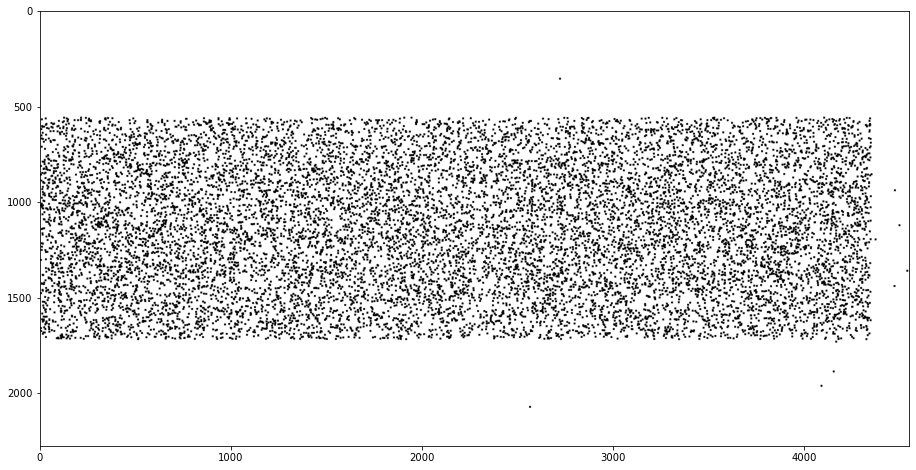

In [6]:
fig, ax = plt.subplots(figsize=(16,8))


inverted = np.ones(canvas.shape) - canvas
imgplot = plt.imshow(inverted, cmap='gray')